In [1]:
import numpy as np 
import pickle
from matplotlib import pyplot as plt
import os
!hostname

c469-133.stampede2.tacc.utexas.edu


# angle sample 1

In [3]:
start=0
end=510

datapath="/work2/07428/binod/stampede2/LRBB-IoMW/"
plotpath="/home1/07428/binod/work2/resonance_sweeping_low_res_sims/"
angle_datapath="/home1/07428/binod/work2/resonance_sweeping_low_res_sims/"
datafilename=str(start)+"_to_"+str(end)+"_fft_barangles_sim_low_res.ang"
ang_stored = open(angle_datapath+datafilename,'rb')
all_bangles=pickle.load(ang_stored)
print(len(all_bangles))

510


# angle sample 2

In [13]:
start=0
end=510

datafilename2=str(start)+"_to_"+str(end)+"_fft_barangles_sim_low_res_r1_to_4.ang"
ang_stored2 = open(angle_datapath+datafilename2,'rb')
all_bangles2=pickle.load(ang_stored2)
print(len(all_bangles2))

510


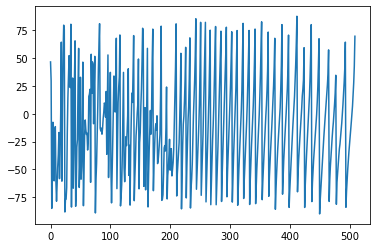

In [14]:
snapshots=np.arange(0,510,1)
plt.plot(snapshots,all_bangles)

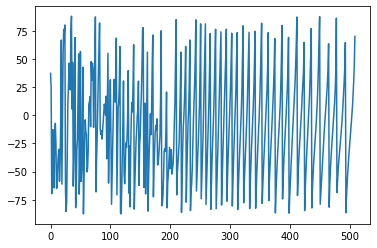

In [15]:
plt.plot(snapshots,all_bangles2)

In [16]:
angle=np.deg2rad(all_bangles2)
TU=0.00977
PS=np.empty(len(angle-1))
for i in range(1,len(angle)-1):
    PS[i-1]=(angle[i]-angle[i-1])/TU
    if angle[i]<angle[i-1]:
        PS[i-1]=(angle[i]+np.pi-angle[i-1])/TU
    #if PS[i-1]<0.:
    #    PS[i-1]=(angle[i]+np.pi-angle[i-1])/TU
PS=PS*3.08567758/3.15576


(200.0, 510.0)

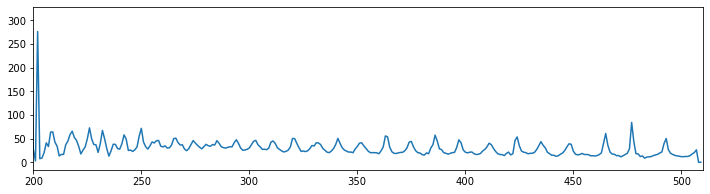

In [17]:
fig1=plt.figure(figsize=(12,3))
ax=fig1.add_subplot(111)
ax.plot(snapshots,PS)
ax.set_xlim(200,510)

In [ ]:
import numpy as np 
import pickle
from matplotlib import pyplot as plt
from galpy.util import coords as coords
import os
import sys
from procedure import *

save_datapath="./"

start=0
finish=510

orbit=open('bar.txt','w')
barangle=0.
oldbarangle=0.
#a=list()
for i in range(start,finish):
    snapshot=i
    snaparr = loadwholesnap(path,snapshot)
    mass=snaparr['mass']  #note mass here is in solar mass (use the factor 2.324876e9)
    r=snaparr['r']
    phi=snaparr['phi']
        
    #calculating bar_angle
    discindx=(mass<5000)
    #barsample=(r>1)*(r<4)*discindx
    barsample=(r<5)*(r>1)
    #counts, bins, patches=plt.hist(phi[barsample],bins=360,range=[-np.pi,np.pi])
    counts, _ = np.histogram(phi[barsample], bins = np.linspace(-np.pi, np.pi, 360))
    ff=np.fft.fft(counts-np.mean(counts))
    barangle=-np.angle(ff[2])/2.
    
    TU=9.778145/1000.
    
    if barangle>oldbarangle+np.pi:
        barangle=barangle-np.pi
    if barangle<oldbarangle:
        if (barangle+2*np.pi)>oldbarangle+np.pi:
            barangle=barangle-np.pi
    print("Calculated barangle at snapshot:",i," bar_angle is",np.rad2deg(barangle))
    print("%E %E" %(i,barangle), file=orbit, flush=True)
    oldbarangle=barangle

[2.60664331 3.15288831 3.48991431 3.88018331 4.07248831 4.99821131
 5.61487341 6.04518231 6.20508759 0.1561429  0.6030673  1.70240731
 3.06765231 4.36513831 4.71580531 5.15199731 5.56122091 5.92849861
 2.17122631 2.58970931 3.10767231 3.57616131 3.73596031 4.05252131
 4.32522431 4.58736331 4.85137631 5.27708731 5.63963111 5.92040131
 5.97734921 6.18472482 0.1769292  0.4718509  0.7149691  1.052328
 1.217121   1.401217   1.78702831 2.66079131 3.91449731 4.56999531
 5.07543031 5.49281331 5.80126391 6.12635141 0.1684093  0.5212801
 0.8511739  1.335187   1.62916131 2.06211731 2.48334631 3.19945431
 4.18656131 4.97724731 5.50271931 6.10608811 0.3747961  0.9221535
 1.390141   1.82973831 2.20451131 2.51884131 2.79018231 3.02162531
 3.29489431 3.58413831 3.80700731 4.06103031 4.36201731 4.72188131
 5.18496331 5.49353851 1.508131   1.97588731 2.43007331 2.81103731
 3.21813631 3.63257731 4.01921331 4.42809631 4.69966531 4.90087531
 5.38038791 5.52072451 5.79885741 6.16198851 2.06572331 2.34516731

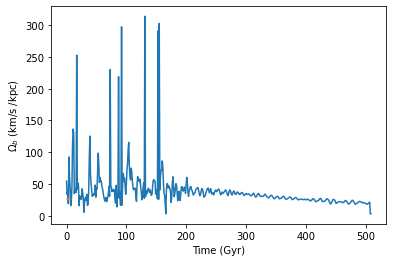

In [45]:
barstuff=np.genfromtxt('bar.txt')
time=barstuff[:,0]
angle=barstuff[:,1]
for i in range(len(angle)):
    if angle[i]<0:
        angle[i]=2*np.pi+angle[i]

print(angle)        

TU=0.00977
PS=np.empty(len(angle-1))
for i in range(1,len(angle)-1):
    PS[i-1]=(angle[i]-angle[i-1])/TU
    if angle[i]<angle[i-1]:
        diff=angle[i]-angle[i-1]
        ang_diff=angle[i]+np.pi-angle[i-1]
        #print("angle[i]<angle[i-1]",diff,ang_diff)
        PS[i-1]=ang_diff/TU
          
    if PS[i-1]<0.:
        ang_diff=angle[i]+2*np.pi-angle[i-1]
        #print(ang_diff)
        PS[i-1]=ang_diff/TU
        print(PS[i-1])
PS=PS*3.08567758/3.15576
plt.plot(time,PS)
plt.plot([0,5],[26,26])
#plt.ylim(25,30)
plt.ylabel(r'$\Omega_b$ (km/s /kpc)')
plt.xlabel('Time (Gyr)')
plt.show()

In [6]:
times=np.genfromtxt(datapath+'times.txt',dtype='str')
time=list()
for i in range(end): #goto len(times) if you want to seek for all times that are calculated so far
    t=float(times[i][11:-2])/1000 # in Gyr
    time.append(t)

time=np.array(time)
time=time*9.778145
print(len(time))

510


In [5]:
patspeed_stored = open("0_to_510_fft_pattern_speed_sim_low_res_r1_to_4.ang",'rb')
PS=pickle.load(patspeed_stored)

In [8]:
patstuff=np.genfromtxt('pattern_speed.txt')
tyme=patstuff[:,0]
pat_spd=patstuff[:,1]

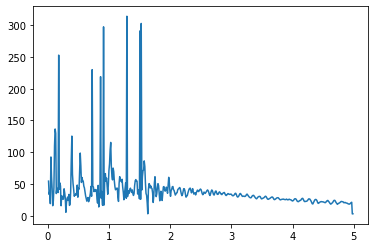

In [9]:
plt.plot(tyme,pat_spd)

Plot generated and saved to file:  da_dt_vs_time_low_res_sims_fft_method_kms_kpc_r_1_4.jpg


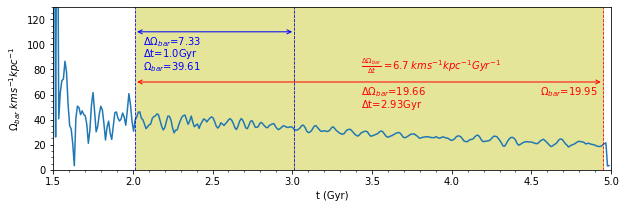

In [84]:
patstuff=np.genfromtxt('pattern_speed.txt')
time=patstuff[:,0]
dadtz=patstuff[:,1]

fig5=plt.figure(figsize=(10,3))
ax=fig5.add_subplot(111)
ax.set_xlabel("t (Gyr)")
ax.set_ylabel("$\Omega$$_{bar}$ $kms^{-1}kpc^{-1}$")

ax.plot(time,dadtz)
ax.set_ylim(0,130)
ax.set_xlim(1.5,5.0)

time_A=205
time_B=307
time_C=505
ax.axvline(x=time[time_A],c='blue',linestyle='--',lw=0.8)
ax.axvline(x=time[time_B],c='blue',linestyle='--',lw=0.8)
ax.axvline(x=time[time_C],c='red',linestyle='--',lw=0.8)

#shading from A to B
ax.axvspan(time[time_A], time[time_B], color='y', alpha=0.4, lw=0.8)
#shading from B to C
ax.axvspan(time[time_B], time[time_C], color='y', alpha=0.4, lw=0.7)

eta1=(dadtz[time_B]-dadtz[time_A])
eta1=abs(eta1)
ax.text(time[210],100,r"$\Delta$$\Omega$$_{bar}$="+str(round(eta1,2)),color="blue")
ax.text(time[210],90,r"$\Delta$t="+str(round(time[time_B]-time[time_A],2))+"Gyr",color="blue")
ax.text(time[210],80,r"$\Omega$$_{bar}$="+str(round(dadtz[time_A],2)),color="blue")

ax.annotate(text='',xy=(time[time_B],110), xytext=(time[time_A],110), arrowprops=dict(edgecolor='blue',arrowstyle='<->'))

#Looking over a larger range


eta=(dadtz[time_C]-dadtz[time_A])
eta=abs(eta)
db_dt=eta/(time[time_C]-time[time_A])
ax.text(time[350],60,r"$\Delta$$\Omega$$_{bar}$="+str(round(eta,2)),color="red")
ax.text(time[350],50,r"$\Delta$t="+str(round(time[time_C]-time[time_A],2))+"Gyr",color="red")

ax.text(time[350],80,r"$\frac{{\Delta}{\Omega}_{bar}}{{\Delta}{t}}$ ="+str(round(db_dt,2))+" $kms^{-1}kpc^{-1}Gyr^{-1}$",color="red")

ax.annotate(text='',xy=(time[time_C],70), xytext=(time[time_A],70), arrowprops=dict(edgecolor='red',arrowstyle='<->'))

ax.text(time[465],60,r"$\Omega$$_{bar}$="+str(round(dadtz[time_C],2)),color="red")


#ax.scatter(time[200],dadtz[200],c="red",s=10)
ax.minorticks_on()
#print(last)
plotname="da_dt_vs_time_low_res_sims_fft_method_kms_kpc_r_1_4.jpg"
print("Plot generated and saved to file: ",plotname)
fig5.savefig(plotname,bbox_inches="tight",dpi=200)
#plt.tight_layout()
plt.show()

#37-40 km/s/kpc